In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
# Load the dataset
df = pd.read_csv('bank.csv')


In [4]:
# Initial analysis
print(df.head())
print(df.info())
print(df.describe())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [5]:
# Checking for null values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


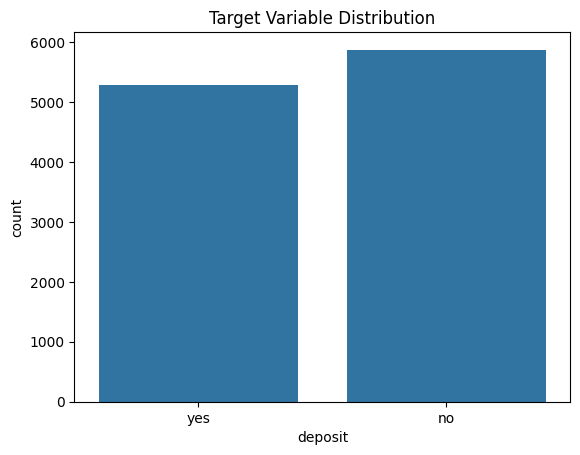

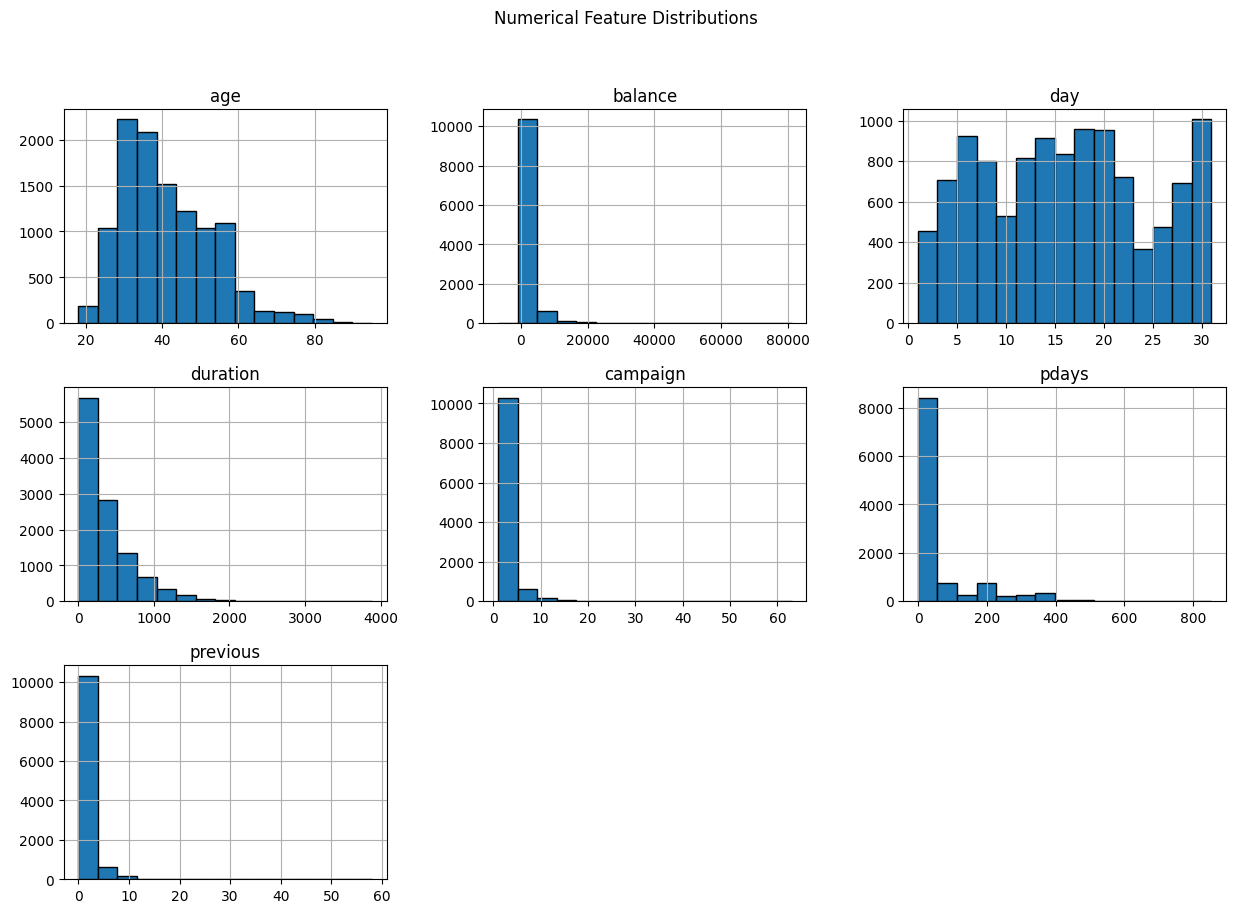

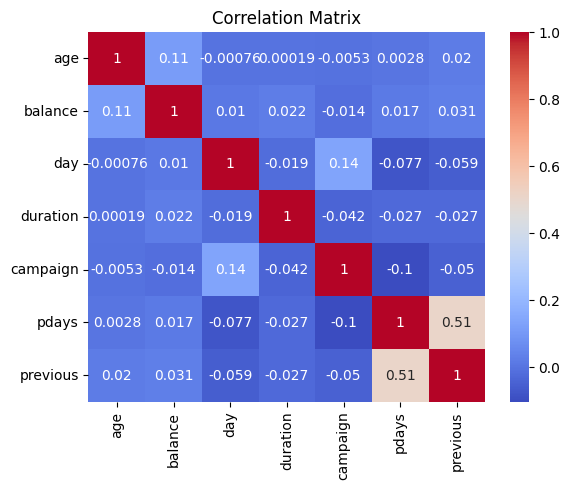

In [6]:
# Target variable distribution
sns.countplot(x='deposit', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Visualizing numerical features
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Numerical Feature Distributions')
plt.show()

# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Encoding categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
# Splitting features and target
X = df.drop(columns=['deposit'])  # Features
y = df['deposit']  # Target

# Scaling numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6739 - loss: 0.5996 - val_accuracy: 0.8012 - val_loss: 0.4522
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8049 - loss: 0.4297 - val_accuracy: 0.8063 - val_loss: 0.4350
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8280 - loss: 0.4004 - val_accuracy: 0.8102 - val_loss: 0.4293
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8330 - loss: 0.3930 - val_accuracy: 0.8141 - val_loss: 0.4230
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8242 - loss: 0.3987 - val_accuracy: 0.8119 - val_loss: 0.4318
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8270 - loss: 0.3927 - val_accuracy: 0.8040 - val_loss: 0.4371
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8330 - loss: 0.3877 - val_accuracy: 0.8108 - val_loss: 0.4230
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8329 - loss: 0.3776 - val_accuracy: 0.

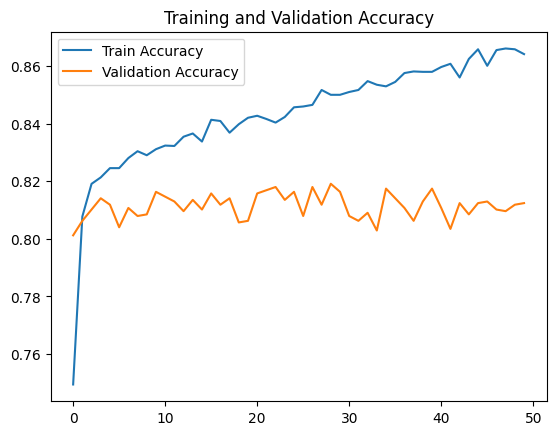

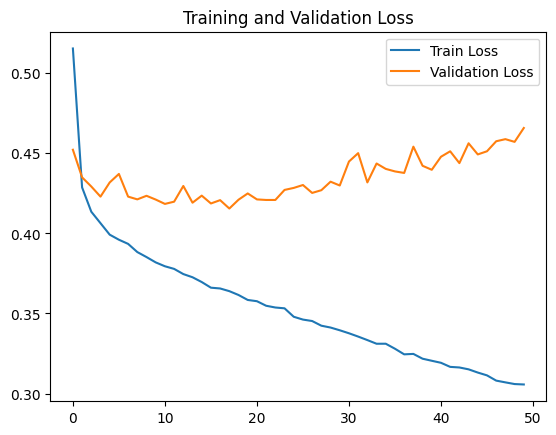

In [9]:
# Building the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Plotting training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8199731303179579
Confusion Matrix:
 [[959 216]
 [186 872]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1175
           1       0.80      0.82      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



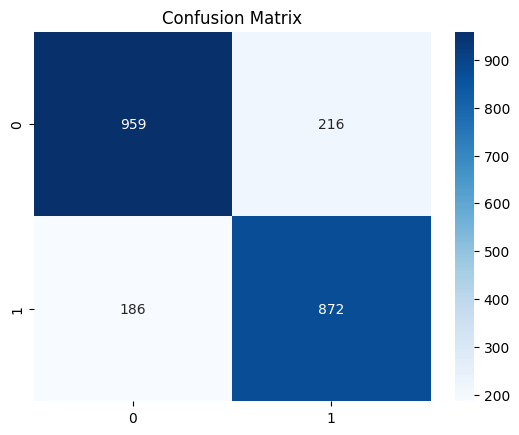

In [10]:
# Evaluating on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [11]:
model.save('bank_marketing_model.h5')